# Section 0: Data preparation

In [1]:
!pip install -q kaggle
!pip install -q statsmodels -U

In [4]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/'

In [6]:
!chmod 600 /content/kaggle.json

In [7]:
!kaggle datasets download -d rakannimer/air-passengers

Dataset URL: https://www.kaggle.com/datasets/rakannimer/air-passengers
License(s): DbCL-1.0
air-passengers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip air-passengers.zip

Archive:  air-passengers.zip
  inflating: AirPassengers.csv       


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Section 1: Simple smoothing
1. Simple moving average
2. Exponential moving average

In [11]:
np.random.seed(42)

time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1, size=len(time))

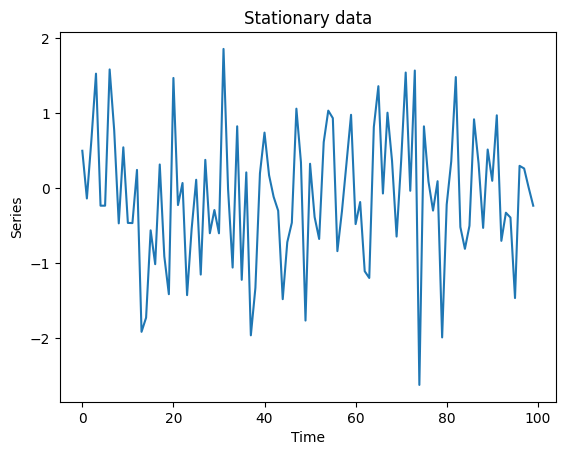

In [13]:
plt.plot(time, stationary)
plt.title("Stationary data")
plt.xlabel("Time")
plt.ylabel("Series")
plt.show()

**Trend**

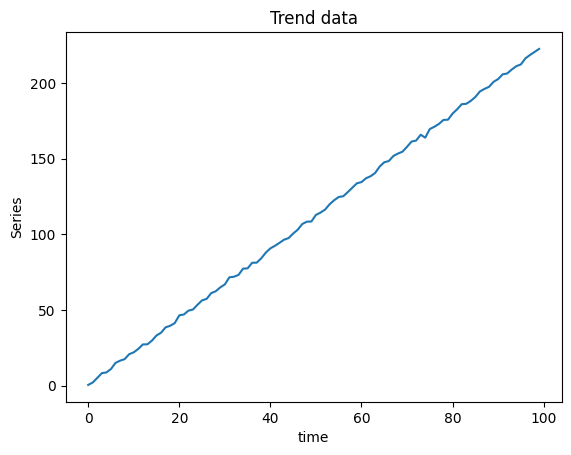

In [14]:
trend = (time*2.25) + stationary

plt.plot(time, trend)
plt.title("Trend data")
plt.xlabel("time")
plt.ylabel("Series")
plt.show()

**Seasonality**

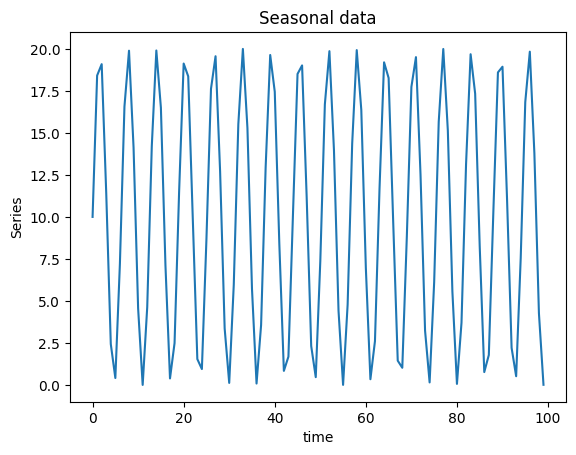

In [15]:
seasonal = 10 + np.sin(time)*10
plt.plot(time, seasonal)
plt.title("Seasonal data")
plt.xlabel("time")
plt.ylabel("Series")
plt.show()

**Trend and Seasonality**

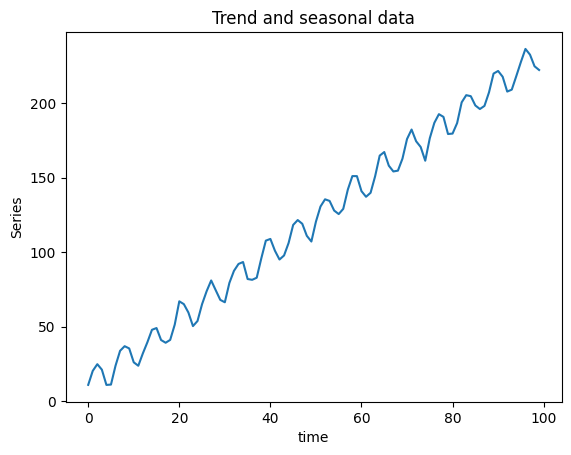

In [19]:
trend_seasonal = trend + seasonal + stationary
plt.plot(time, trend_seasonal)
plt.title("Trend and seasonal data")
plt.xlabel("time")
plt.ylabel("Series")
plt.show()

**Exponential**

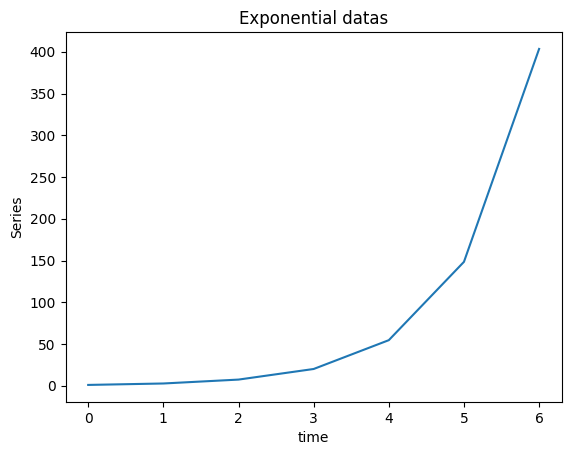

In [20]:
t = np.arange(7)
expo = np.exp(t)

plt.plot(t,expo)
plt.title("Exponential datas")
plt.xlabel("time")
plt.ylabel("Series")
plt.show()

# Smoothing with moving average

In [42]:
def moving_average(observation, window=3, forcast=False):
  cumsum = np.cumsum(observation, dtype=float)
  # print(cumsum + "Line 1")
  cumsum[window:] = cumsum[window:] - cumsum[:-window]
  # print(cumsum + "Line 2")
  output = cumsum[window - 1:] / window
  # print(output + "Line 3")
  if forcast:
    return np.append(output,np.ones(3)*output[-1])
  else:
    return output

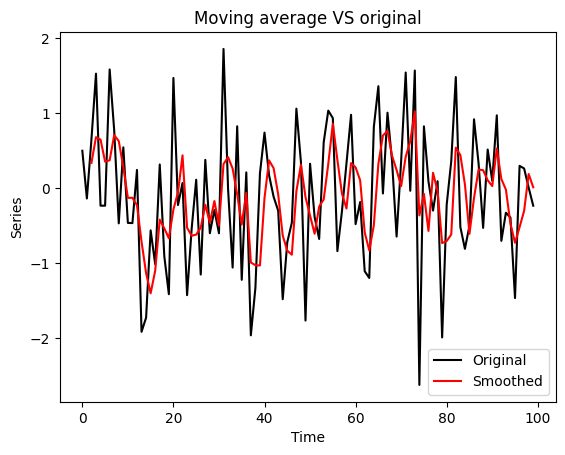

In [46]:
plt.plot(time, stationary, color='black', label='Original')

smooth_stationary = moving_average(stationary, window=3, forcast=False)
plt.plot(time[2:], smooth_stationary, color='red', label='Smoothed')
plt.title("Moving average VS original")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

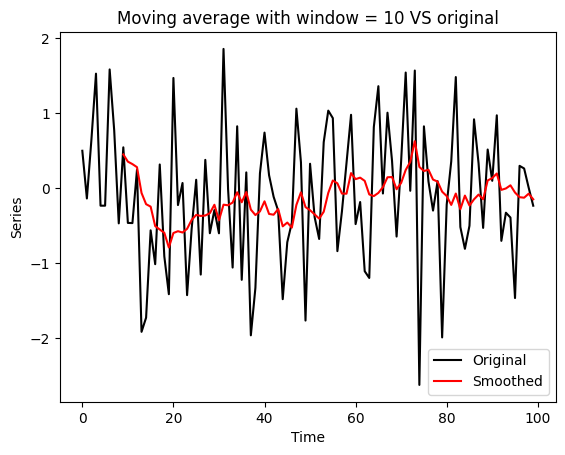

In [52]:
# let's try expand window
smooth_stationary = moving_average(stationary, window=10, forcast=False)
plt.plot(time, stationary, color='black', label='Original')

plt.plot(time[9:], smooth_stationary, color='red', label='Smoothed')
plt.title("Moving average with window = 10 VS original")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

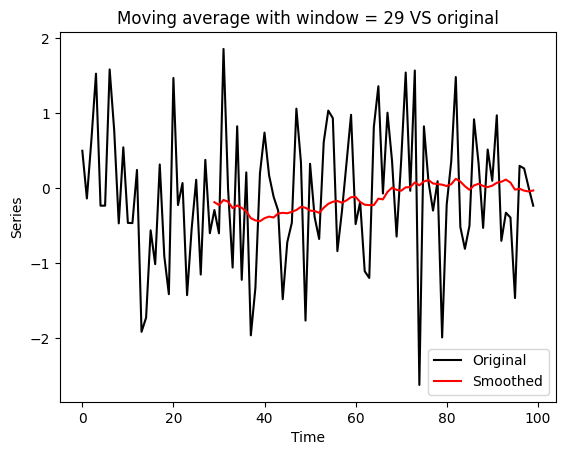

In [55]:
# let's try expand window
smooth_stationary = moving_average(stationary, window=30, forcast=False)
plt.plot(time, stationary, color='black', label='Original')

plt.plot(time[29:], smooth_stationary, color='red', label='Smoothed')
plt.title("Moving average with window = 29 VS original")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()
# Increasing window will data will more follow trend

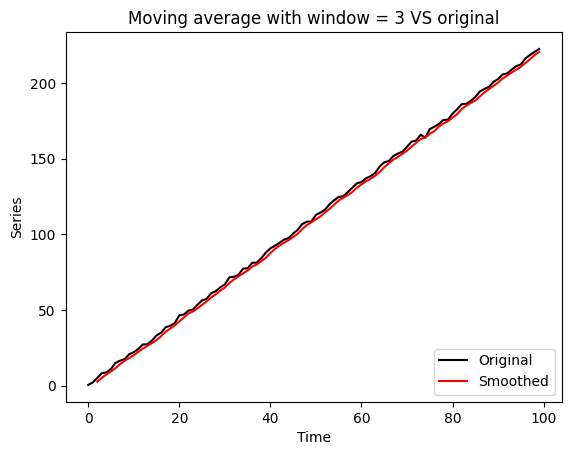

In [56]:
# Try other data
smoothing_trend = moving_average(trend, window=3, forcast=False)

plt.plot(time, trend, color='black', label='Original')

plt.plot(time[2:], smoothing_trend, color='red', label='Smoothed')
plt.title("Moving average with window = 3 VS original")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

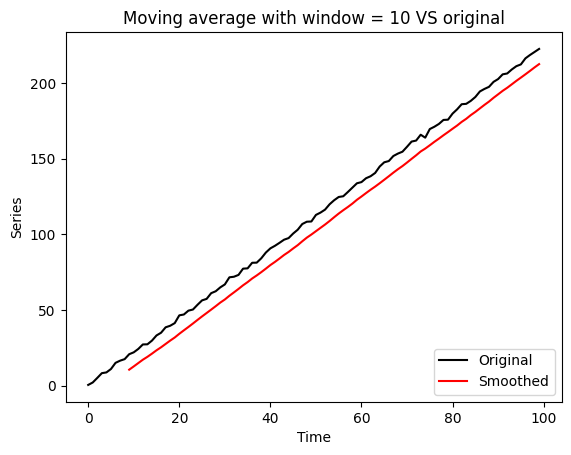

In [58]:
# Increase window with trend data
smoothing_trend = moving_average(trend, window=10, forcast=False)

plt.plot(time, trend, color='black', label='Original')

plt.plot(time[9:], smoothing_trend, color='red', label='Smoothed')
plt.title("Moving average with window = 10 VS original")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()
# Generated gap between data and smoothing trend

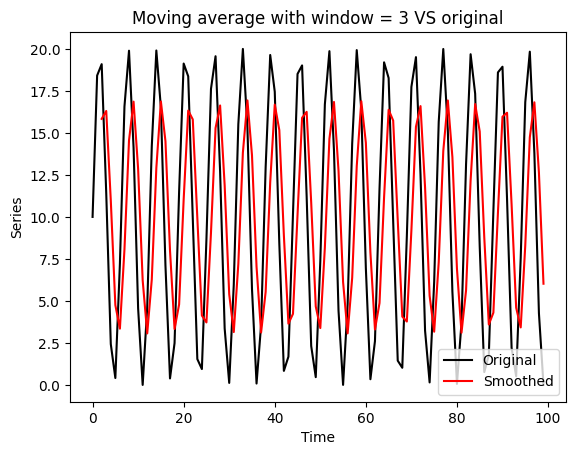

In [62]:
# let's try other data
smoothing_seasonal = moving_average(seasonal, window=3, forcast=False)

plt.plot(time, seasonal, color='black', label='Original')

plt.plot(time[2:], smoothing_seasonal, color='red', label='Smoothed')
plt.title("Moving average with window = 3 VS original")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

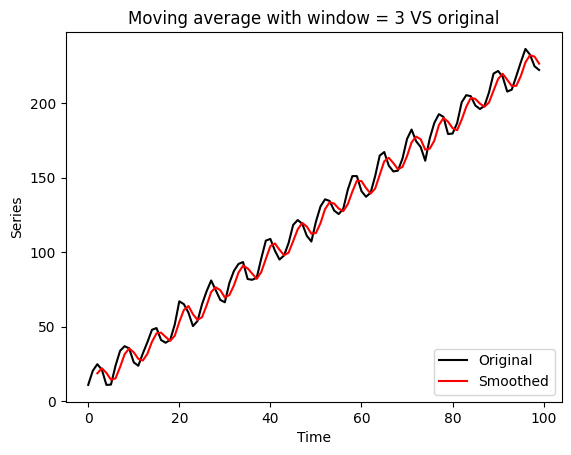

In [63]:
# let's try other data
smoothing_seasonal_trend = moving_average(trend_seasonal, window=3, forcast=False)

plt.plot(time, trend_seasonal, color='black', label='Original')

plt.plot(time[2:], smoothing_seasonal_trend, color='red', label='Smoothed')
plt.title("Moving average with window = 3 VS original")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

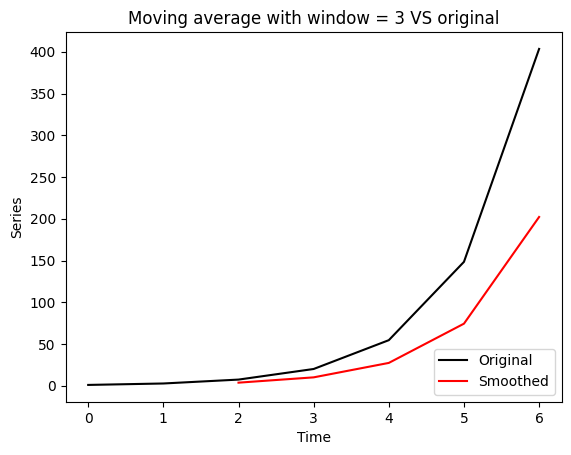

In [66]:
# let's try exponential data
# let's try other data
smoothing_expo = moving_average(expo, window=3, forcast=False)

plt.plot(t, expo, color='black', label='Original')

plt.plot(t[2:], smoothing_expo, color='red', label='Smoothed')
plt.title("Moving average with window = 3 VS original")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

# Exponential can't be captured by simple moving average

# Smoothing with non-uniform weights

In [69]:
def numa(observation, forcast=True):
  # You can determine weight with yourself
  # sum of weight have to equal 1
  weights = np.array([0.160, 0.294, 0.546])
  output = np.ones(len(observation), dtype='float')
  for i in range(2, len(observation)):
    output[i] = np.sum(weights*observation[i-2:i+1])
  output = output[2:]
  if forcast:
    return np.append(output, np.ones(3)*output[-1])
  else:
    return output

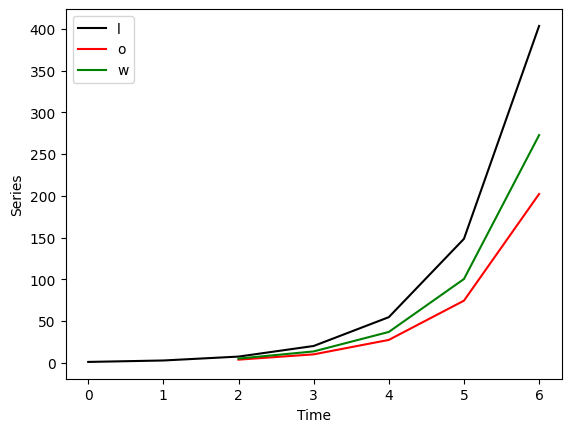

In [71]:
numa_smooth = numa(expo, forcast=False)

plt.plot(t, expo, label='Original', color='black')
plt.plot(t[2:], smoothing_expo, color='red', label='Simple moving average')
plt.plot(t[2:], numa_smooth, color='green', label='Non-uniform moving average')

plt.xlabel("Time")
plt.ylabel("Series")
plt.legend("lower right")
plt.show()

# Section 2: exponential weighted moving average
Three types:
1. Single Exponential
2. Double Exponential
3. Triple Exponential

# Single Exponential
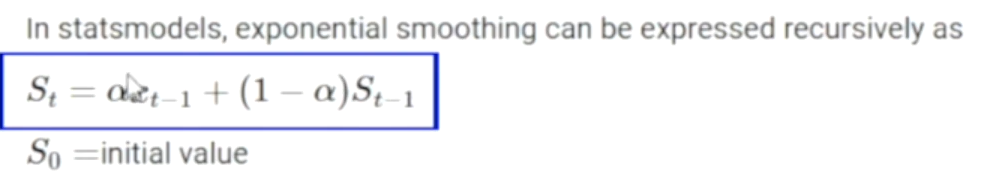  

Can't track trend and seasonality

In [77]:
test_size = 5
train = trend_seasonal[:-test_size]
test = trend_seasonal[-test_size:]

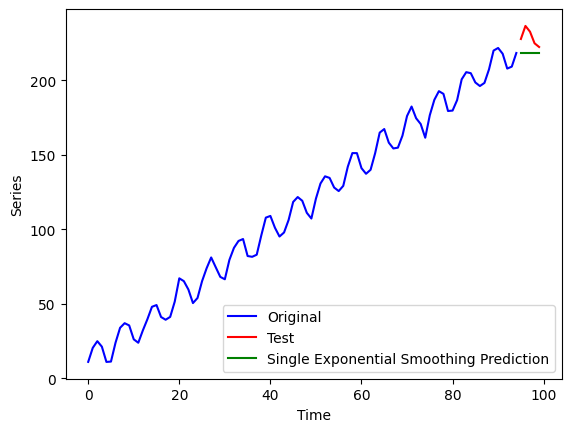

In [81]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
# optimized will auto use alpha and intial value that fit with training data
single_pred = single.forecast(test_size)

plt.plot(time[:-test_size], train, color='blue', label="Original")
plt.plot(time[-test_size:], test, color='red', label="Test")
plt.plot(time[-test_size:], single_pred, color='green', label="Single Exponential Smoothing Prediction")
plt.legend(loc='lower right')
plt.xlabel("Time")
plt.ylabel("Series")
plt.show()

In [79]:
print(single.predict(1,10))
print(train[0:10])

[10.99342831 20.38818111 24.88835128 21.20725985 10.96366845 11.19248334
 23.86427046 33.8547353  36.95463365 35.45630496]
[10.99342831 20.38818125 24.88835134 21.20725979 10.9636683  11.19248334
 23.86427065 33.85473545 36.95463369 35.45630494]


In [82]:
single.params

{'smoothing_level': np.float64(0.9999999850988388),
 'smoothing_trend': np.float64(nan),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(10.993428306022466),
 'initial_trend': np.float64(nan),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
single2 = SimpleExpSmoothing(train).fit(optimized=True, smoothing_level=0.5)

print(single2.predict(1,10))
print(train[:10])
print(single2.params_formatted)

[10.99342831 15.69080478 20.28957806 20.74841893 15.85604361 13.52426348
 18.69426706 26.27450125 31.61456747 33.53543621]
[10.99342831 20.38818125 24.88835134 21.20725979 10.9636683  11.19248334
 23.86427065 33.85473545 36.95463369 35.45630494]
                  name      param  optimized
smoothing_level  alpha   0.500000      False
initial_level      l.0  10.993428      False


/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


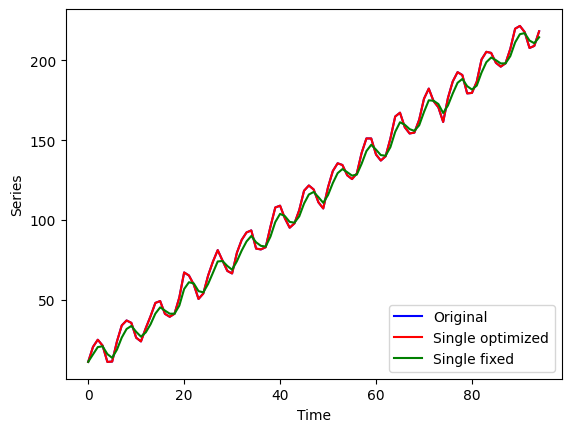

In [95]:
plt.plot(time[:-test_size], train, color='blue', label="Original")
plt.plot(time[:-test_size], single.predict(1,len(train)), color='red', label='Single optimized')
plt.plot(time[:-test_size], single2.predict(1,len(train)),color='green', label='Single fixed')
plt.legend(loc='lower right')
plt.xlabel("Time")
plt.ylabel("Series")
plt.show()

# Double exponential

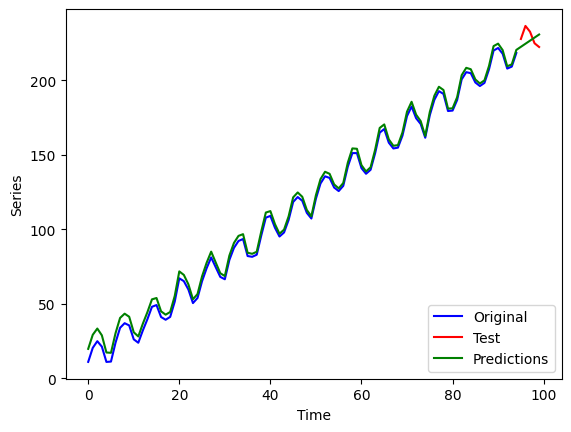

In [105]:
from statsmodels.tsa.api import Holt
double = Holt(train).fit(optimized=True)
double_pred = double.predict(1,len(time))

plt.plot(time[:-test_size], train, color='blue', label="Original")
plt.plot(time[-test_size:], test, color='red', label='Test')
plt.plot(time, double_pred, color='green', label="Predictions")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

# Triple Exponential

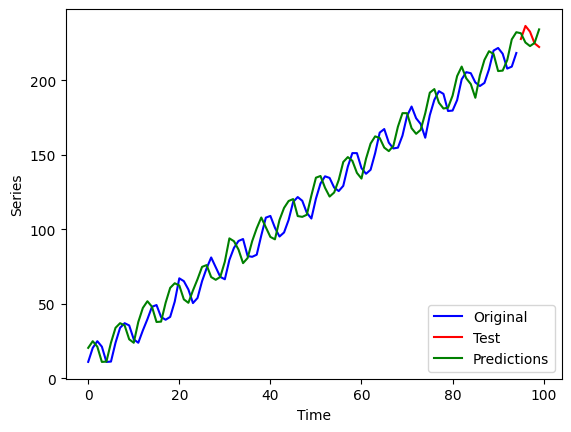

In [110]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

triple = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)
triple_pred = triple.predict(1,len(time))

plt.plot(time[:-test_size], train, color='blue', label="Original")
plt.plot(time[-test_size:], test, color='red', label='Test')
plt.plot(time, triple_pred, color='green', label="Predictions")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

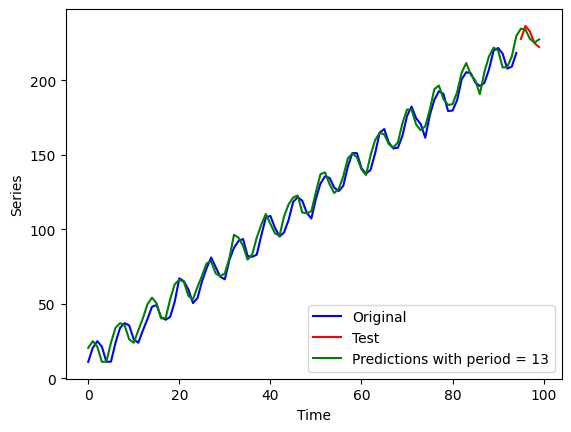

In [112]:
# Try another periods
triple = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=13).fit(optimized=True)
triple_pred = triple.predict(1,len(time))

plt.plot(time[:-test_size], train, color='blue', label="Original")
plt.plot(time[-test_size:], test, color='red', label='Test')
plt.plot(time, triple_pred, color='green', label="Predictions with period = 13")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

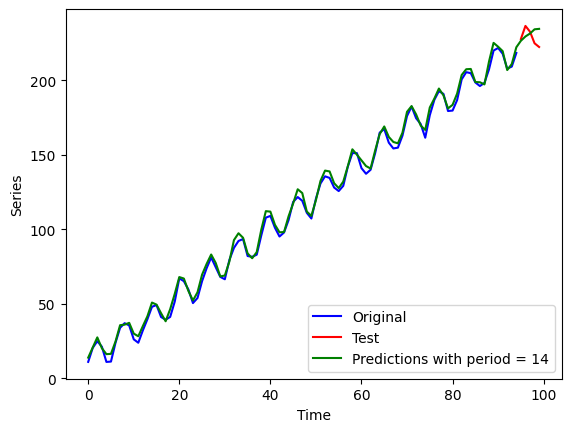

In [113]:
# Try another periods
triple = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=14).fit(optimized=True)
triple_pred = triple.predict(1,len(time))

plt.plot(time[:-test_size], train, color='blue', label="Original")
plt.plot(time[-test_size:], test, color='red', label='Test')
plt.plot(time, triple_pred, color='green', label="Predictions with period = 14")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

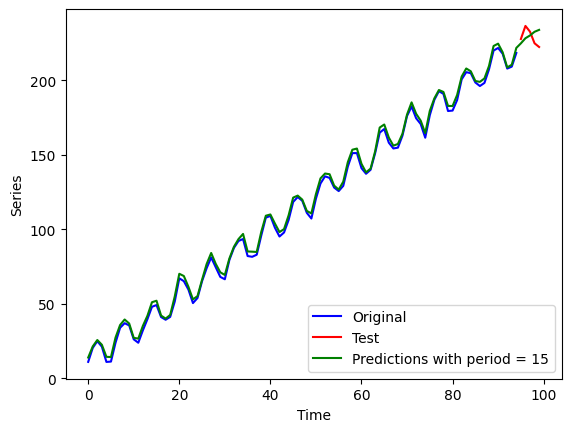

In [114]:
# Try another periods
triple = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=15).fit(optimized=True)
triple_pred = triple.predict(1,len(time))

plt.plot(time[:-test_size], train, color='blue', label="Original")
plt.plot(time[-test_size:], test, color='red', label='Test')
plt.plot(time, triple_pred, color='green', label="Predictions with period = 15")
plt.xlabel("Time")
plt.ylabel("Series")
plt.legend(loc='lower right')
plt.show()

# Smoothing air passengers datasets

/tmp/ipython-input-181922580.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format=True)


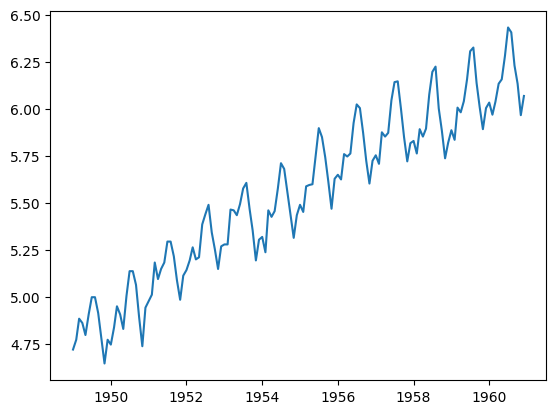

In [121]:
df = pd.read_csv("AirPassengers.csv")
df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format=True)
df.set_index("Month", inplace=True)
df = np.log(df)
# Change from multiplicative datasets to additive by using log transformation

plt.plot(df)

In [126]:
test_size = 10
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


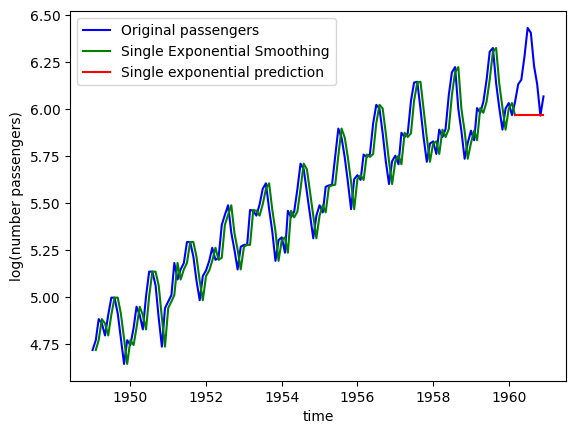

In [127]:
single = SimpleExpSmoothing(train).fit(optimized=True)
single_pred = single.predict(1,len(train))
single_forecast = single.forecast(test_size)

plt.plot(df, label='Original passengers', color='blue')
plt.plot(single_pred, label='Single Exponential Smoothing', color='green')
plt.plot(single_forecast, label="Single exponential prediction", color='red')
plt.legend()
plt.xlabel("time")
plt.ylabel("log(number passengers)")
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


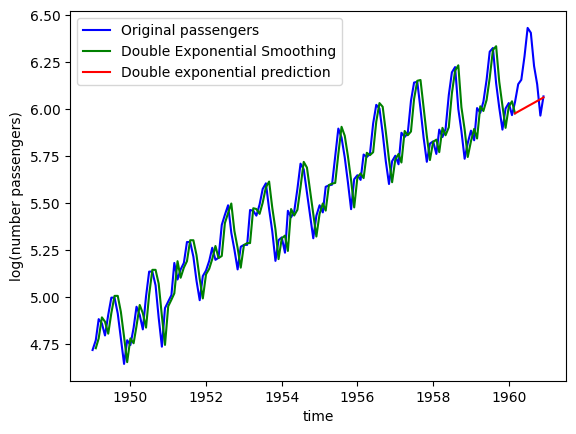

In [130]:
double = ExponentialSmoothing(train, trend='add').fit(optimized=True)
double_pred = double.predict(1, len(train))
double_forecast = double.forecast(test_size)

plt.plot(df, label='Original passengers', color='blue')
plt.plot(double_pred, label='Double Exponential Smoothing', color='green')
plt.plot(double_forecast, label="Double exponential prediction", color='red')
plt.legend()
plt.xlabel("time")
plt.ylabel("log(number passengers)")
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


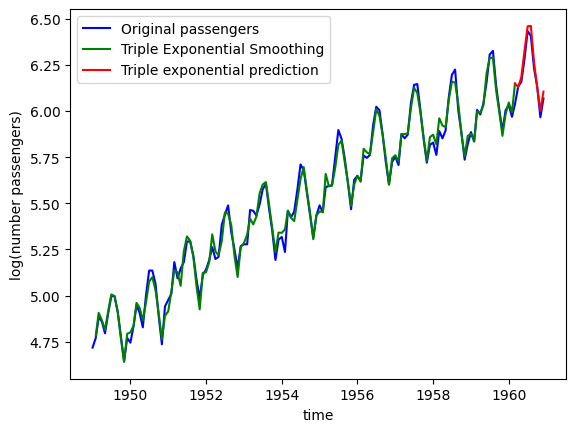

In [131]:
triple = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)
triple_pred = triple.predict(1, len(train))
triple_forecast = triple.forecast(test_size)

plt.plot(df, label='Original passengers', color='blue')
plt.plot(triple_pred, label='Triple Exponential Smoothing', color='green')
plt.plot(triple_forecast, label="Triple exponential prediction", color='red')
plt.legend()
plt.xlabel("time")
plt.ylabel("log(number passengers)")
plt.show()

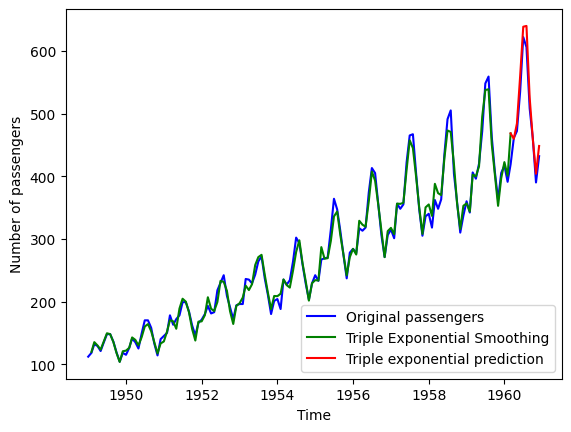

In [132]:
# Convert values back

plt.plot(np.exp(df), label='Original passengers', color='blue')
plt.plot(np.exp(triple_pred), label='Triple Exponential Smoothing', color='green')
plt.plot(np.exp(triple_forecast), label='Triple exponential prediction', color='red')

plt.legend(loc='lower right')
plt.xlabel("Time")
plt.ylabel("Number of passengers")
plt.show()